# Lab Exercise: Analyzing Weather Data

## Objective
The goal of this lab exercise is to use Pandas and Matplotlib to do some very simple EDA

## Dataset
The dataset we will use is a CSV file containing weather data for a particular city. The dataset includes columns for date, temperature, wind speed, and precipitation.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Load the data from the CSV file
df = pd.read_csv('weather_data.csv')

# Print the first 5 rows of the dataframe
df.head()


,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


In [3]:
# Get a summary of the dataframe
df.info()
print()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16743 entries, 0 to 16742
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data.Precipitation         16743 non-null  float64
 1   Date.Full                  16743 non-null  object 
 2   Date.Month                 16743 non-null  int64  
 3   Date.Week of               16743 non-null  int64  
 4   Date.Year                  16743 non-null  int64  
 5   Station.City               16743 non-null  object 
 6   Station.Code               16743 non-null  object 
 7   Station.Location           16743 non-null  object 
 8   Station.State              16743 non-null  object 
 9   Data.Temperature.Avg Temp  16743 non-null  int64  
 10  Data.Temperature.Max Temp  16743 non-null  int64  
 11  Data.Temperature.Min Temp  16743 non-null  int64  
 12  Data.Wind.Direction        16743 non-null  int64  
 13  Data.Wind.Speed            16743 non-null  flo

,Data.Precipitation,Date.Month,Date.Week of,Date.Year,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
count,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000
mean,0.579090,6.343128,15.650242,2016.018933,56.089112,66.042406,45.642716,18.791316,6.329820
std,0.988057,3.490723,8.923425,0.136294,18.798295,19.787954,18.559263,6.461527,3.494785
min,0.000000,1.000000,1.000000,2016.000000,-27.000000,-19.000000,-35.000000,0.000000,0.000000
25%,0.000000,3.000000,8.000000,2016.000000,44.000000,53.000000,33.000000,15.000000,4.040000
50%,0.190000,6.000000,16.000000,2016.000000,58.000000,68.000000,47.000000,19.000000,5.940000
75%,0.750000,9.000000,24.000000,2016.000000,71.000000,82.000000,60.000000,23.000000,8.080000
max,20.890000,12.000000,31.000000,2017.000000,100.000000,111.000000,88.000000,36.000000,61.100000


## EDA

Let's see if we can spot some simple trends in this data. 

Note that I am _not_ doing any splitting in this notebook because I am not trying to make any predictions. The problem is that I now cannot use this data to train on b/c I will have overfitted, at least on the level of conceptually. **You can't touch your test data under any circumstances.**


### Let's discover seasons

First let's see if there's some kind of relationship between temperature and the date. Let's cut to the chase. There is.

First I'm going to visualize it as scatter plot with a fitted quadratic curve. Note that this is a linear combination of variables and coefficients. This quadratic curve is _still a linear model!_

I'm also going to visualize the distributions by month using "box and whisker" and violin plots." These allow you to visualize a distribution in terms of how the datapoints "cluster." It'll make sense when you see it. Box and whisker plots are standard, but I capital B Believe in violin plots.

temp = -0.000001 days^2 + 0.011122 days + 21.383831


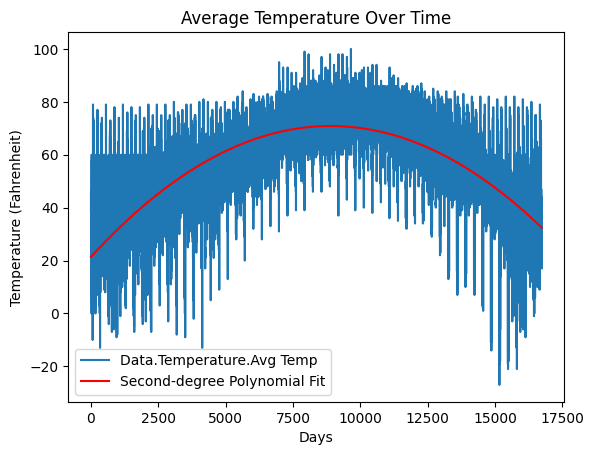

In [7]:
# Fit a second-degree polynomial to the average temperature over time
poly_coeffs = np.polyfit(df.index, df['Data.Temperature.Avg Temp'], deg=2)
poly_curve = np.poly1d(poly_coeffs)

a,b,c = poly_coeffs
print(f"temp = {a:.6f} days^2 + {b:.6f} days + {c:.6f}")

# Scatter plot of average temperature over time
df['Data.Temperature.Avg Temp'].plot(kind='line')
plt.title('Average Temperature Over Time')
plt.xlabel('Days')
plt.ylabel('Temperature (Fahrenheit)')

# Add polynomial curve
plt.plot(df.index, poly_curve(df.index), color='red', label='Second-degree Polynomial Fit')

# Add legend
plt.legend()
plt.show()



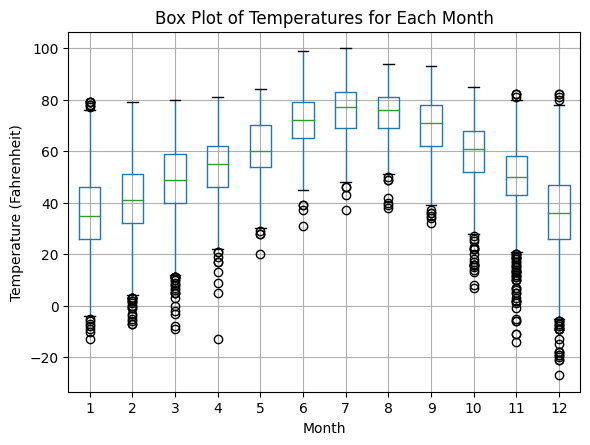

In [21]:
# Box plot of temperatures for each month
df.boxplot(column=['Data.Temperature.Avg Temp'], by='Date.Month')
plt.title('Box Plot of Temperatures for Each Month')
plt.xlabel('Month')
plt.ylabel('Temperature (Fahrenheit)')
plt.suptitle('')  # Suppress the automatic 'Boxplot grouped by' title
plt.show()


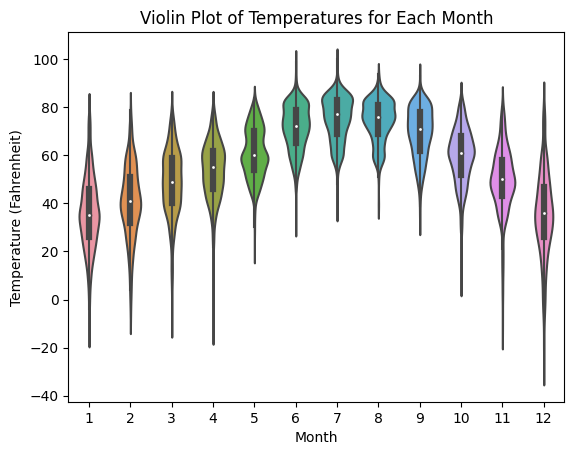

In [22]:
# Violin plot of temperatures for each month
sns.violinplot(x='Date.Month', y='Data.Temperature.Avg Temp', data=df)
plt.title('Violin Plot of Temperatures for Each Month')
plt.xlabel('Month')
plt.ylabel('Temperature (Fahrenheit)')
plt.show()

### I would expect wind speed to be normally distributed, and lo and behold, it is

#### First, a simple histogram

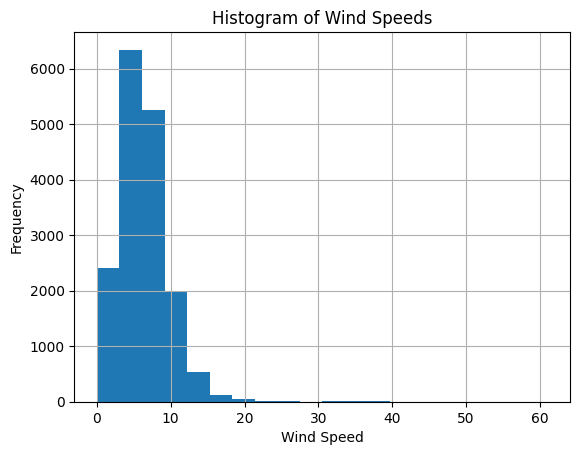

In [9]:
df['Data.Wind.Speed'].hist(bins=20)
plt.title('Histogram of Wind Speeds')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()


#### I'm not seeing much. Let's see what we get if we chop off the tail

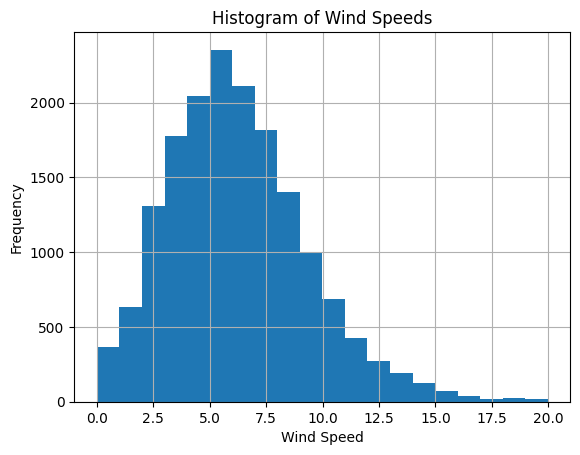

In [23]:
df.loc[df['Data.Wind.Speed'] < 20]['Data.Wind.Speed'].hist(bins=20)
plt.title('Histogram of Wind Speeds')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

#### That looks pretty good. Let's do that again and fit a normal distribution to it.

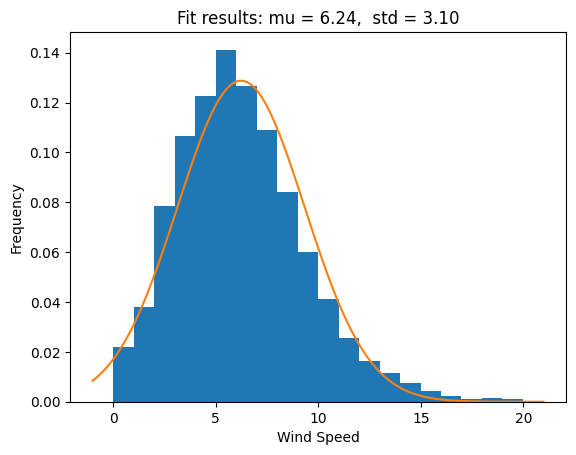

In [20]:
data = df.loc[df['Data.Wind.Speed'] < 20]['Data.Wind.Speed']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Now I need to do the histogram as a PDF not a raw count
plt.hist(data, bins=20, density=True)

# I need to get the appropriate x axis
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# and the y values of the normal distribution I fit abot
p = norm.pdf(x, mu, std)

plt.plot(x, p)
plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

### Temperature does not cause rain!

Next we will try to determine whether there is a relationship between temperature and rain. R^2 is a very common way to measure the linearity of the correlation between data. That's important. It doesn't measure how correlated two datasets are, it measures the linearity of the correlation. [Always visualize your data!](https://blog.revolutionanalytics.com/2017/05/the-datasaurus-dozen.html)

In [24]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to the data
X = df['Data.Temperature.Avg Temp'].values
y = df['Data.Precipitation'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Scatter plot of average temperature vs. precipitation
df.plot(kind='scatter', x='Data.Temperature.Avg Temp', y='Data.Precipitation')
plt.title('Average Temperature vs. Precipitation')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Precipitation')

# Add regression line
plt.plot(X, y_pred, color='red', label=f'Regression line (R^2 = {r2:.2f})')

# Add legend
plt.legend()
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[39 39 46 ... 17 23 21].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

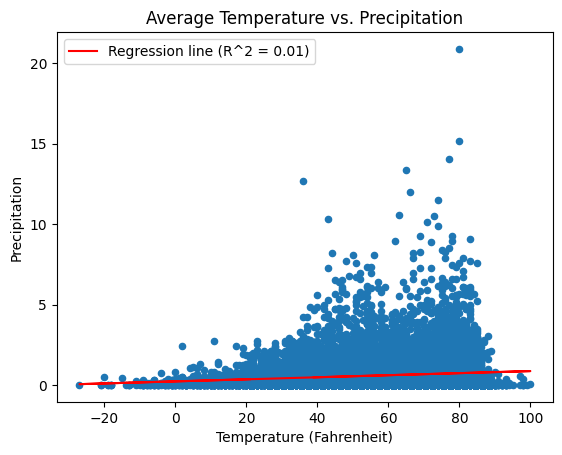

In [25]:
# That didn't work but it told us how to fix it so...
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to the data
X = df['Data.Temperature.Avg Temp'].values.reshape(-1,1)
y = df['Data.Precipitation'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Scatter plot of average temperature vs. precipitation
df.plot(kind='scatter', x='Data.Temperature.Avg Temp', y='Data.Precipitation')
plt.title('Average Temperature vs. Precipitation')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Precipitation')

# Add regression line
plt.plot(X, y_pred, color='red', label=f'Regression line (R^2 = {r2:.2f})')

# Add legend
plt.legend()
plt.show()